# Cho dữ liệu train.tsv, test.tsv nằm trong thư mục movies - Rotten Tomatoes movie review dataset . 
# Bộ dữ liệu này được sử dụng để dự đoán tình cảm của người dùng dành cho các phim.

## Có các nhãn "sentiment" sau:
- 0 - negative
- 1 - somewhat negative
- 2 - neutral
- 3 - somewhat positive
- 4 - positive

# Yêu cầu:
## 1. Đọc dữ liệu
## 2. Phân tích sơ bộ dữ liệu
## 3. Tạo wordcloud của Positive và Negative review. In danh sách 20 từ có trọng số lớn (chữ to) trong word cloud. Trực quan hóa dữ liệu
## 4. Lọc lại dữ liệu, chỉ giữ lại những mẫu có phần Phrase nhận xét từ 50 ký tự trở lên. Chia dữ liệu thành 2 bộ source và target
## 5. Chọn phương pháp để chuẩn hóa dữ liệu và thực hiện việc chuẩn hóa (với dữ liệu đã lọc ởphần 4)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('data5/Ex4_Movie_Review_Sentiment_Analysis/train.tsv', sep='\t')
train

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [7]:
test = pd.read_csv('data5/Ex4_Movie_Review_Sentiment_Analysis/test.tsv', sep='\t')
test = test.merge(pd.read_csv('data5/Ex4_Movie_Review_Sentiment_Analysis/sampleSubmission.csv'), on='PhraseId')
test

,PhraseId,SentenceId,Phrase,Sentiment
0,156061,8545,An intermittently pleasing but mostly routine ...,2
1,156062,8545,An intermittently pleasing but mostly routine ...,2
2,156063,8545,An,2
3,156064,8545,intermittently pleasing but mostly routine effort,2
4,156065,8545,intermittently pleasing but mostly routine,2
...,...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario .",2
66288,222349,11855,"A long-winded , predictable scenario",2
66289,222350,11855,"A long-winded ,",2
66290,222351,11855,A long-winded,2


## 2. Phân tích sơ bộ dữ liệu

In [10]:
sentiment_count = train['Sentiment'].value_counts()
sentiment_count

Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64

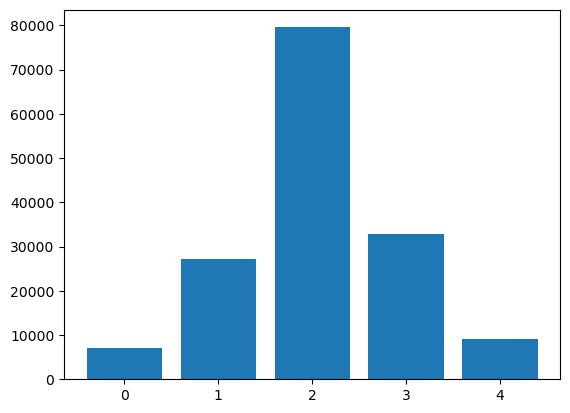

In [12]:
plt.bar(sentiment_count.index, sentiment_count);

## 3. Tạo wordcloud của Positive và Negative review. In danh sách 20 từ có trọng số lớn (chữ to) trong word cloud. Trực quan hóa dữ liệu

### <span style='color:red'>Negative

In [16]:
neg_phrases = train['Phrase'][train['Sentiment']==0] #pandas series object

In [18]:
neg_text = neg_phrases.str.cat(sep=' ') #Concatenate all neg_phrases into one string neg_text, with separator between phrases is ' '
                                        # .cat() is method of str pandas series, not a standalone function

In [20]:
from wordcloud import WordCloud, STOPWORDS

In [22]:
stopwords_set = set(STOPWORDS) #use set to remove duplicates

In [24]:
#Create word cloud object with following wanted parameters
wc_neg = WordCloud(
    background_color='black',
    max_words=200,
    stopwords=stopwords_set,
    width=1600, height=800,
    max_font_size=200
)

#Generate word cloud with neg_text
wc_neg.generate(neg_text)

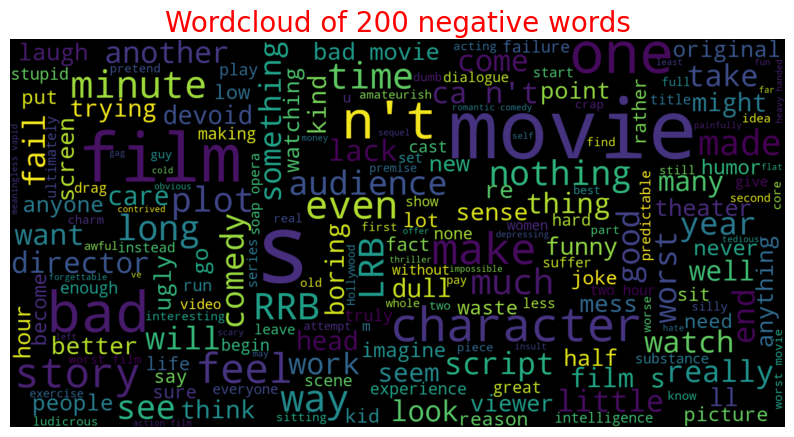

In [25]:
#Display word cloud object
plt.figure(figsize=(10,12))
plt.imshow(wc_neg, interpolation='bilinear')
plt.title('Wordcloud of 200 negative words', size=20, color='red')
plt.axis('off') #Don't show axis
plt.show()


# interpolation="bilinear" means that pixel values are computed using a weighted average of the nearest four pixels in a 2x2 grid, 
# making the image appear smoother compared to a "nearest" or "none" interpolation (which would display the image without smoothing).

In [28]:
#Create dataframe of first 20 big negative words with their frequency

first_20_big_words_neg = {k:wc_neg.words_[k] for k in list(wc_neg.words_)[:20]}
# list(wc_neg.words_)[:20] will return a list of first 20 big negative words (keys), but not along with their frequency (values)

df_20_word_neg = pd.DataFrame(first_20_big_words_neg.items(), columns=['word', 'frequency'])
df_20_word_neg

,word,frequency
0,s,1.000000
1,movie,0.714785
2,film,0.454016
3,one,0.322468
4,bad,0.302678
5,n't,0.265425
6,character,0.208382
7,make,0.178114
8,story,0.161816
9,feel,0.154831


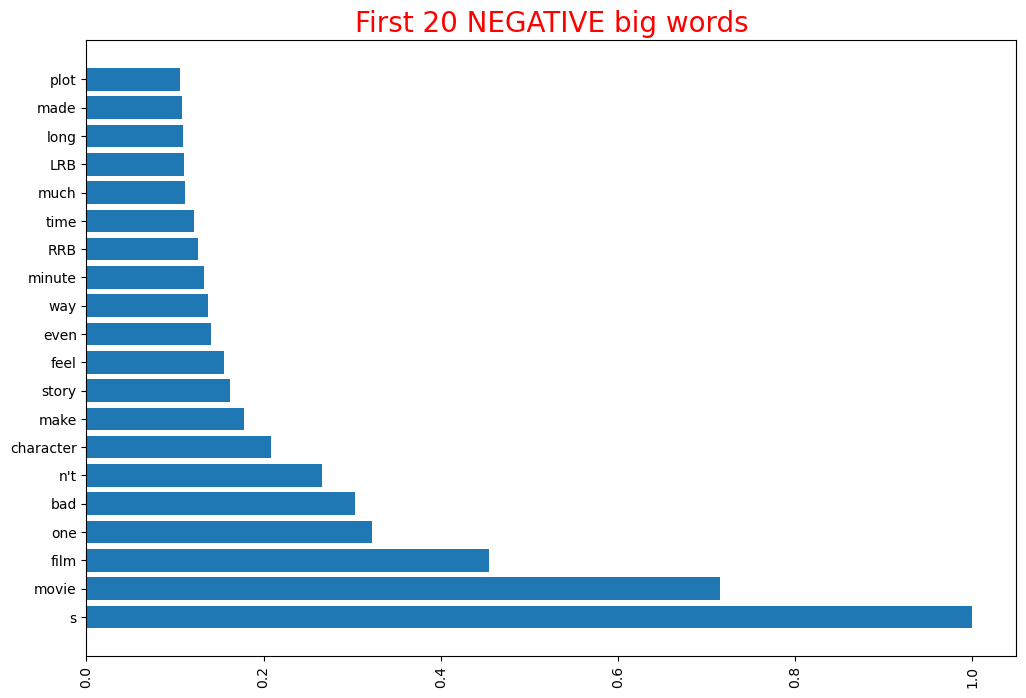

In [30]:
plt.figure(figsize=(12,8))
plt.barh(df_20_word_neg['word'], df_20_word_neg['frequency']) # barh() means bar-horizontal
plt.xticks(rotation=90)
plt.title('First 20 NEGATIVE big words', size=20, color='red')
plt.show()

### <span style='color:green'>Positive

In [33]:
pos_phrase = train['Phrase'][train['Sentiment']==4]
pos_text = pos_phrase.str.cat(sep=' ')

In [35]:
wc_pos = WordCloud(
    background_color='black',
    stopwords=stopwords_set,
    max_words=200,
    width=1600, height=800,
    max_font_size=200
)

wc_pos.generate(pos_text)

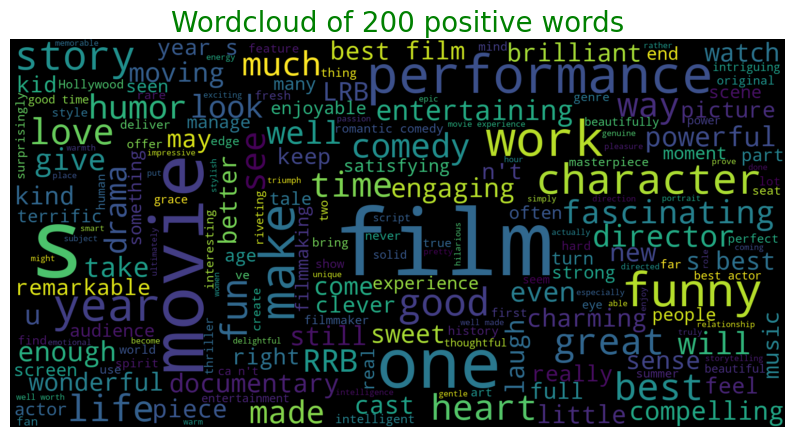

In [36]:
plt.figure(figsize=(10,12))
plt.imshow(wc_pos, interpolation='bilinear')
plt.title('Wordcloud of 200 positive words', size=20, color='green')
plt.axis('off') #Don't show axis
plt.show()

In [39]:
first_20_big_words_pos = {k:wc_pos.words_[k] for k in list(wc_pos.words_)[:20]}

df_20_word_pos = pd.DataFrame(first_20_big_words_pos.items(), columns=['word', 'frequency'])

df_20_word_pos

,word,frequency
0,s,1.000000
1,film,0.894046
2,movie,0.547931
3,one,0.480323
4,performance,0.243189
5,work,0.211907
6,make,0.207871
7,funny,0.191726
8,year,0.180626
9,character,0.154390


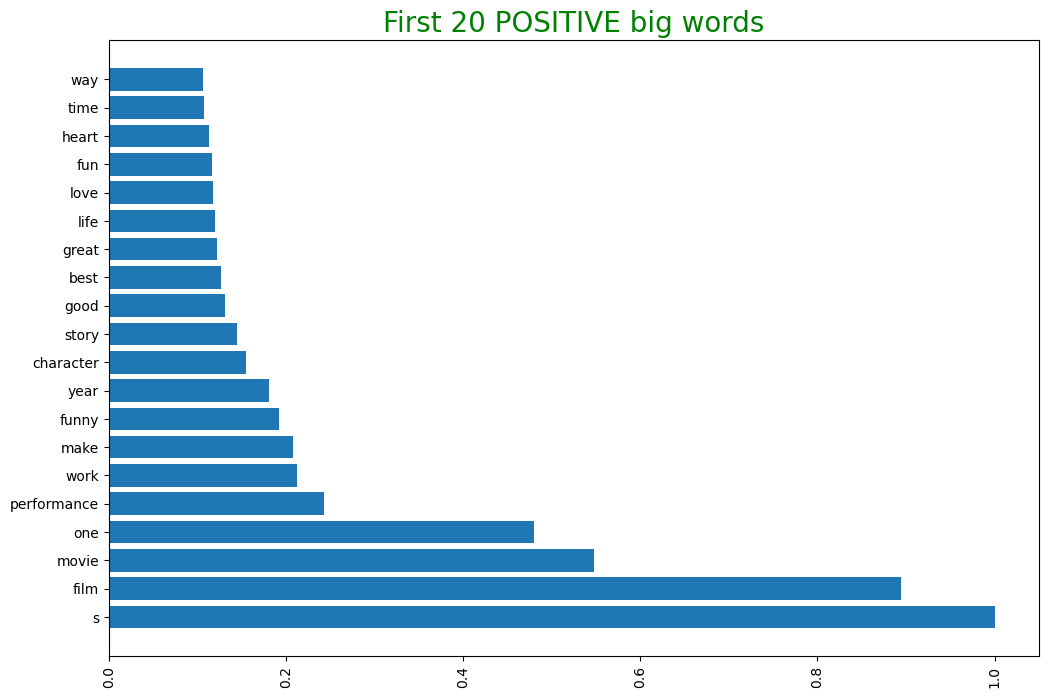

In [41]:
plt.figure(figsize=(12,8))
plt.barh(df_20_word_pos['word'], df_20_word_pos['frequency'])
plt.xticks(rotation=90)
plt.title('First 20 POSITIVE big words', size=20, color='green')
plt.show()

## 4. Lọc lại dữ liệu, chỉ giữ lại những mẫu có phần Phrase nhận xét từ 50 ký tự trở lên. Chia dữ liệu thành 2 bộ source và target

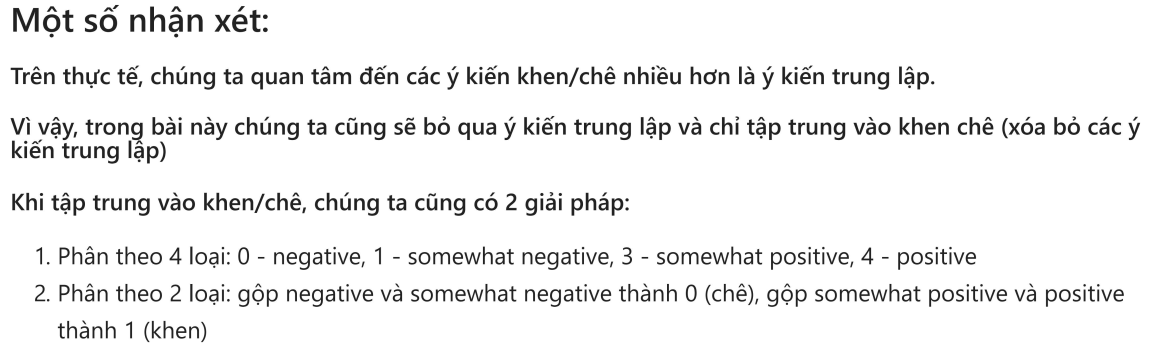

# <span style='color:red'>Method 1 (4 labels):
- 0: negative
- 1: somewhat negative
- 3: somewhat positive
- 4: positive

# <span style='color:red'>Use Tf-Idf

In [46]:
train['Phrase_length'] = [len(phrase) for phrase in train['Phrase']]

In [48]:
#source
x_1 = train['Phrase'][(train['Phrase_length'] >= 50) & (train['Sentiment'] != 2)]
x_1 = x_1.replace('([^a-zA-Z])', ' ', regex=True).str.lower()
x_1 = x_1.replace('(\s+)', ' ', regex=True)

x_1

0         a series of escapades demonstrating the adage ...
33        the gander some of which occasionally amuses b...
63        this quiet introspective and entertaining inde...
64        this quiet introspective and entertaining inde...
66         quiet introspective and entertaining independent
                                ...                        
156014    anchoring the characters in the emotional real...
156021     lrb tries rrb to parody a genre that s alread...
156026    a genre that s already a joke in the united st...
156031    the movie s downfall is to substitute plot for...
156047    quietly suggesting the sadness and obsession b...
Name: Phrase, Length: 30025, dtype: object

In [50]:
#target
y_1 = train['Sentiment'][(train['Phrase_length'] >= 50) & (train['Sentiment'] != 2)]
y_1 = pd.to_numeric(y_1)
y_1

0         1
33        1
63        4
64        3
66        4
         ..
156014    3
156021    1
156026    1
156031    1
156047    1
Name: Sentiment, Length: 30025, dtype: int64

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_1 = TfidfVectorizer(stop_words='english')

x_1_transformed = tfidf_1.fit_transform(x_1).toarray()

In [53]:
from sklearn.model_selection import train_test_split
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1_transformed, y_1, test_size=0.2)

In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

clf_1 = MultinomialNB()
clf_1.fit(x_1_train, y_1_train)

print('MultinomialNB Model score in train set =', clf_1.score(x_1_train, y_1_train))
print('MultinomialNB Model score in test set =', clf_1.score(x_1_test, y_1_test))
print()

y_1_pred_test = clf_1.predict(x_1_test)

print(confusion_matrix(y_1_test, y_1_pred_test))

print()

print(classification_report(y_1_test, y_1_pred_test))

MultinomialNB Model score in train set = 0.7099916736053289
MultinomialNB Model score in test set = 0.6261448792672772

[[  88  632   58    2]
 [  55 1673  379    1]
 [   2  314 1861   85]
 [   0   47  670  138]]

              precision    recall  f1-score   support

           0       0.61      0.11      0.19       780
           1       0.63      0.79      0.70      2108
           3       0.63      0.82      0.71      2262
           4       0.61      0.16      0.26       855

    accuracy                           0.63      6005
   macro avg       0.62      0.47      0.46      6005
weighted avg       0.62      0.63      0.58      6005



### The gap between model's score in train and test set is significant (not good)
### Score only ~0.64
### => Try out method 2

# <span style='color:red'>Method 2 (2 labels):
- 0: negative & somewhat negative
- 1: somewhat positive & positive
# <span style='color:red'>Use Tf-Idf

In [62]:
x_2 = train['Phrase'][(train['Phrase_length'] >= 50) & (train['Sentiment'] != 2)]
x_2 = x_1.replace('([^a-zA-Z])', ' ', regex=True).str.lower()
x_2 = x_1.replace('(\s+)', ' ', regex=True)

y_2 = train['Sentiment'][(train['Phrase_length'] >= 50) & (train['Sentiment'] != 2)].apply(str) #convert to string to apply regex
y_2 = y_2.replace('(0|1)', '0', regex=True)
y_2 = y_2.replace('(3|4)', '1', regex=True)
y_2 = pd.to_numeric(y_2)

In [64]:
tfidf_2 = TfidfVectorizer(stop_words='english')
x_2_transformed = tfidf_2.fit_transform(x_2).toarray()
x_2_transformed.shape

(30025, 14074)

In [66]:
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2_transformed, y_2, test_size=0.2)

In [68]:
clf_2 = MultinomialNB()
clf_2.fit(x_2_train, y_2_train)

print('MultinomialNB Model score in train set =', clf_2.score(x_2_train, y_2_train))
print('MultinomialNB Model score in test set =', clf_2.score(x_2_test, y_2_test))
print()

y_2_pred_test = clf_2.predict(x_2_test)

print(confusion_matrix(y_2_test, y_2_pred_test))
print()

print(classification_report(y_2_test, y_2_pred_test))

MultinomialNB Model score in train set = 0.9186927560366361
MultinomialNB Model score in test set = 0.8751040799333888

[[2461  412]
 [ 338 2794]]

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2873
           1       0.87      0.89      0.88      3132

    accuracy                           0.88      6005
   macro avg       0.88      0.87      0.87      6005
weighted avg       0.88      0.88      0.88      6005



## Result of Method 2:
## The  <span style='color:red'>score</span> of model has been significantly improved, from 0.64 to <span style='color:red'>0.88